In [1]:
#imports
import pandas as pd
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
import matplotlib
import textwrap
import plotly.express as px
pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure
import numpy as np
import folium
import squarify
import geopandas as gpd
from shapely.geometry import Point
import contextily as ctx
import plotly.graph_objects as go
from folium.plugins import MarkerCluster
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from statsmodels.tsa.stattools import adfuller
!pip install pmdarima --quiet
import pmdarima as pm
from sklearn import metrics
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

data points: 

Monthly Data that is in the process of scraping from Toronto Real Estate Board:

Sales
Dollar Volume
Average Price
Median Price
New Listings 
SNLR Trend 
Active Listings 
Mos Inv (Trend)
Avg. SP/LP 
Avg. LDOM 
Avg. PDOM

look into daily 

monthly data available from stats can (via python) 

New Housing Price Index 

3yr Bond Rate
5yr Bond Rate
Bankers Acceptance rate 1 year 
Bank Rate 
Target Rate 
Prime Corporate Paper Rate 
Overnight Money Market Financing Rate
Mortgage Rate 


Employment Rate
Inflation Rate
Unemployement Rate 
GDP 
Residential building permits
Housing starts
Shelter price index
Population (15+)
Housing completions
Labour force

29 data points 


Choose hyperparams through grid search or AIC: 

In [2]:
#import t_stats, toronto_all_stats and exo stats 

In [3]:
# Import DataFrame from CSV
t_stats = pd.read_csv('t_stats.csv')

t_stats


,Month,Median Price
0,2013-01-01,413500
1,2013-02-01,434000
2,2013-03-01,441000
3,2013-04-01,453500
4,2013-05-01,478500
5,2013-06-01,455000
6,2013-07-01,439000
7,2013-08-01,423000
8,2013-09-01,451510
9,2013-10-01,467000


In [4]:
x_stats = pd.read_csv('x_stats.csv')

x_stats

,CPI_Can,New_Housing_Price_Index,Inflation,GDP,ON_Unemployment_Rate,Bank_Rate,CAN_Mort_Lending_Rate5yr,Mortgage_Var_Rate,Mortgage_Fixed_Rate_5yr,TO_Units_Absorbed,Bond_1-3yr_Avg
0,121.3,91.8,1.3,1729586.0,7.7,1.25,4.14,3.57,3.00,942.0,1.16
1,122.7,91.9,1.5,1734805.0,7.5,1.25,4.11,3.52,2.98,900.0,1.12
2,122.9,92.0,1.5,1740839.0,7.6,1.25,4.02,3.51,2.99,982.0,1.01
3,122.7,92.2,1.2,1743937.0,7.6,1.25,4.02,3.52,2.99,966.0,1.00
4,123.0,92.4,1.2,1748724.0,7.5,1.25,4.02,3.50,2.96,930.0,1.04
5,123.0,92.5,1.2,1742396.0,7.6,1.25,4.00,3.49,2.93,996.0,1.18
6,123.1,92.7,1.3,1752447.0,7.7,1.25,4.08,3.31,3.00,1085.0,1.17
7,123.1,92.8,1.2,1760130.0,7.7,1.25,4.14,3.13,3.11,1221.0,1.23
8,123.3,92.8,1.3,1766098.0,7.5,1.25,4.33,3.03,3.20,915.0,1.27
9,123.0,92.9,1.2,1775606.0,7.6,1.25,4.40,2.95,3.27,926.0,1.15


# START

# 2020

In [5]:
target_trainM = t_stats['Median Price'][:-25]
target_trainY = t_stats['Median Price'][:-41]
exog_trainM = x_stats[:-25]
exog_trainY = x_stats[:-41]

In [6]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMA(endog: Union[pd.Series, list], order_list: list, d: 
 int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog, 
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [7]:
from itertools import product
 
ps = range(0, 13, 1)
qs = range(0, 13, 1)    
Ps = [0]
Qs = [0]    

d = 1
D = 0
s = 12
 
ARIMA_order_list = list(product(ps, qs, Ps, Qs))

In [8]:
ARIMA_result_df = optimize_SARIMA(target_trainY, ARIMA_order_list, d, D, s)
ARIMA_result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62859/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/169 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-pa

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaco

,"(p,q,P,Q)",AIC
0,"(7, 7, 0, 0)",1944.137506
1,"(2, 2, 0, 0)",1945.379747
2,"(9, 9, 0, 0)",1945.505583
3,"(7, 8, 0, 0)",1948.079391
4,"(9, 8, 0, 0)",1948.136199
5,"(5, 2, 0, 0)",1949.173177
6,"(7, 10, 0, 0)",1949.221163
7,"(3, 5, 0, 0)",1949.624752
8,"(4, 5, 0, 0)",1949.708415
9,"(7, 12, 0, 0)",1949.770888


In [8]:
ARIMA_model1 = SARIMAX(target_trainY, order=(7,1,7), simple_differencing=False)
ARIMA_model1_fit = ARIMA_model1.fit(disp=False)

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [9]:
test1 = t_stats.iloc[84:96]
test1

,Month,Median Price
84,2020-01-01,725000
85,2020-02-01,788000
86,2020-03-01,800000
87,2020-04-01,749950
88,2020-05-01,785000
89,2020-06-01,815000
90,2020-07-01,810000
91,2020-08-01,815000
92,2020-09-01,840000
93,2020-10-01,836100


In [10]:
test1['naive_seasonal'] = t_stats['Median Price'].iloc[72:84].values
test1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_63391/1557425075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['naive_seasonal'] = t_stats['Median Price'].iloc[72:84].values


,Month,Median Price,naive_seasonal
84,2020-01-01,725000,647000
85,2020-02-01,788000,677000
86,2020-03-01,800000,682000
87,2020-04-01,749950,720000
88,2020-05-01,785000,753000
89,2020-06-01,815000,741000
90,2020-07-01,810000,705000
91,2020-08-01,815000,685000
92,2020-09-01,840000,738000
93,2020-10-01,836100,751000


In [11]:
ARIMA_pred1 = ARIMA_model1_fit.get_prediction(84,95).predicted_mean
test1['ARIMA_pred1'] = ARIMA_pred1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_63391/1207707952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['ARIMA_pred1'] = ARIMA_pred1


In [12]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1
84,2020-01-01,725000,647000,699828.999664
85,2020-02-01,788000,677000,711416.295950
86,2020-03-01,800000,682000,705330.988015
87,2020-04-01,749950,720000,721514.218192
88,2020-05-01,785000,753000,740692.152318
89,2020-06-01,815000,741000,737981.732084
90,2020-07-01,810000,705000,720910.355797
91,2020-08-01,815000,685000,688663.634102
92,2020-09-01,840000,738000,710425.688319
93,2020-10-01,836100,751000,736647.017013


In [ ]:
#test with d=1, and D=1 and d=1, and D=0
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)
 
SARIMA_order_list = list(product(ps, qs, Ps, Qs))
 
d = 1
D = 0
s = 12
 
SARIMA_result_df1 = optimize_SARIMA(target_trainY, SARIMA_order_list, d, D, s)
SARIMA_result_df1

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62859/2473469477.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn(

In [13]:
# (p,q,P,Q)	AIC
# 0	(3, 0, 1, 1)	2510.704583
# 1	(0, 3, 1, 1)	2511.036432
# 2	(2, 1, 1, 1)	2511.049245
# 3	(3, 1, 1, 1)	2512.267354

In [15]:
SARIMA_model1 = SARIMAX(target_trainY, order=(3,1,0), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model1_fit = SARIMA_model1.fit(disp=False)

SARIMA_model2 = SARIMAX(target_trainY, order=(0,1,3), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model2_fit = SARIMA_model2.fit(disp=False)

SARIMA_model3 = SARIMAX(target_trainY, order=(2,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model3_fit = SARIMA_model3.fit(disp=False)

SARIMA_model4 = SARIMAX(target_trainY, order=(3,1,1), seasonal_order=(1,0,1,12), simple_differencing=False)
SARIMA_model4_fit = SARIMA_model4.fit(disp=False)

In [36]:
#SARIMA_model1_fit.plot_diagnostics(figsize=(10,10));

In [37]:
# from statsmodels.stats.diagnostic import acorr_ljungbox
 
# residuals = SARIMA_model1_fit.resid

In [16]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1
84,2020-01-01,725000,647000,699828.999664
85,2020-02-01,788000,677000,711416.295950
86,2020-03-01,800000,682000,705330.988015
87,2020-04-01,749950,720000,721514.218192
88,2020-05-01,785000,753000,740692.152318
89,2020-06-01,815000,741000,737981.732084
90,2020-07-01,810000,705000,720910.355797
91,2020-08-01,815000,685000,688663.634102
92,2020-09-01,840000,738000,710425.688319
93,2020-10-01,836100,751000,736647.017013


In [17]:
SARIMA_pred1 = SARIMA_model1_fit.get_prediction(84,95).predicted_mean
 
test1['SARIMA_pred1'] = SARIMA_pred1

SARIMA_pred2 = SARIMA_model2_fit.get_prediction(84,95).predicted_mean
 
test1['SARIMA_pred2'] = SARIMA_pred2

SARIMA_pred3 = SARIMA_model3_fit.get_prediction(84,95).predicted_mean
 
test1['SARIMA_pred3'] = SARIMA_pred3

SARIMA_pred4 = SARIMA_model4_fit.get_prediction(84,95).predicted_mean
 
test1['SARIMA_pred4'] = SARIMA_pred4

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_63391/183141962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred1'] = SARIMA_pred1
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_63391/183141962.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test1['SARIMA_pred2'] = SARIMA_pred2
/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_63391/183141962.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

In [18]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
84,2020-01-01,725000,647000,699828.999664,727845.382675,727819.451516,727340.509574,728889.126395
85,2020-02-01,788000,677000,711416.295950,747033.351734,746525.061378,745817.870426,748093.557771
86,2020-03-01,800000,682000,705330.988015,754812.195366,753706.328241,753256.781437,755664.263199
87,2020-04-01,749950,720000,721514.218192,768523.437153,767254.851862,766955.674166,769243.059180
88,2020-05-01,785000,753000,740692.152318,772662.514190,771500.896418,771296.293391,773419.360387
89,2020-06-01,815000,741000,737981.732084,766606.829860,765589.753769,765373.617483,767386.018532
90,2020-07-01,810000,705000,720910.355797,750175.974078,749325.476158,749003.777594,750956.718719
91,2020-08-01,815000,685000,688663.634102,743888.768392,743050.662824,742679.002939,744633.916823
92,2020-09-01,840000,738000,710425.688319,765007.630210,763925.614190,763667.030198,765856.658754
93,2020-10-01,836100,751000,736647.017013,769494.904163,768372.275016,768352.278973,770326.772956


In [19]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
 
mape_naive_seasonal = mape(test1['Median Price'], test1['naive_seasonal'])
mape_ARIMA1 = mape(test1['Median Price'], test1['ARIMA_pred1'])
mape_SARIMA1 = mape(test1['Median Price'], test1['SARIMA_pred1'])
mape_SARIMA2 = mape(test1['Median Price'], test1['SARIMA_pred2'])
mape_SARIMA3 = mape(test1['Median Price'], test1['SARIMA_pred3'])
mape_SARIMA4 = mape(test1['Median Price'], test1['SARIMA_pred4'])

In [20]:
print("MAPE NAIVE: ", mape_naive_seasonal)
print("MAPE ARIMA1: ", mape_ARIMA1)
print("MAPE SARIMA1: ", mape_SARIMA1)
print("MAPE SARIMA2: ", mape_SARIMA2)
print("MAPE SARIMA3: ", mape_SARIMA3)
print("MAPE SARIMA4: ", mape_SARIMA4)

MAPE NAIVE:  9.80875824467009
MAPE ARIMA1:  9.111708934287694
MAPE SARIMA1:  5.428695442472272
MAPE SARIMA2:  5.495120850306704
MAPE SARIMA3:  5.512193051827038
MAPE SARIMA4:  5.381673234721585


In [21]:
# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_naive_seasonal, mape_ARIMA1, mape_SARIMA1, mape_SARIMA2, mape_SARIMA3, mape_SARIMA4]}
# Create a DataFrame from the dictionary
df = pd.DataFrame(data)

# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2021' , 'ARIMA(4,1,5)', 'SARIMA(3,1,0)(1,0,1)', 'SARIMA(0,1,3)(1,0,1)', 'SARIMA(2,1,1)(1,0,1)', 
           'SARIMA(4,1,5)(1,0,1)']

# Display the DataFrame
df

,MAPE
Naive - 2021,9.808758
"ARIMA(4,1,5)",9.111709
"SARIMA(3,1,0)(1,0,1)",5.428695
"SARIMA(0,1,3)(1,0,1)",5.495121
"SARIMA(2,1,1)(1,0,1)",5.512193
"SARIMA(4,1,5)(1,0,1)",5.381673


In [22]:
from typing import Union
from tqdm import tqdm_notebook
from statsmodels.tsa.statespace.sarimax import SARIMAX
 
def optimize_SARIMAX(endog: Union[pd.Series, list], exog: Union[pd.Series, 
 list], order_list: list, d: int, D: int, s: int) -> pd.DataFrame:
    
    results = []
    
    for order in tqdm_notebook(order_list):
        try: 
            model = SARIMAX(
                endog,
                exog,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q,P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', 
 ascending=True).reset_index(drop=True)
    
    return result_df

In [23]:
p = range(0, 4, 1)
d = 1
q = range(0, 4, 1)
P = range(0, 4, 1)
D = 0
Q = range(0, 4, 1)
s = 12
 
parameters = product(p, q, P, Q)
parameters_list = list(parameters)

In [31]:
result_df = optimize_SARIMAX(target_trainY, exog_trainY, parameters_list, d, D, s)
result_df

/var/folders/5t/6l7y1cln3zb54s7r50bzxx080000gn/T/ipykernel_62859/4118411627.py:10: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for order in tqdm_notebook(order_list):


  0%|          | 0/256 [00:00<?, ?it/s]

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelih

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA param

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-in

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/user/o

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible start

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/Users/user/opt/anaconda3/lib/python3.9/

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q,P,Q)",AIC
0,"(3, 0, 1, 0)",1919.031412
1,"(3, 0, 1, 1)",1919.761802
2,"(3, 0, 2, 0)",1920.472123
3,"(3, 1, 1, 0)",1920.740537
4,"(2, 1, 1, 1)",1920.971688
5,"(3, 0, 1, 2)",1921.069351
6,"(2, 1, 1, 0)",1921.094330
7,"(3, 2, 1, 0)",1921.174917
8,"(3, 0, 2, 1)",1921.372355
9,"(3, 0, 3, 0)",1921.441814


In [24]:
def recursive_forecast(parList, endog: Union[pd.Series, list], exog: Union[pd.Series, list], train_len: int, horizon: int, window: int, method: str) -> list:
    
    p = parList[0]
    q = parList[1]
    d = parList[2]
    P = parList[3]
    Q = parList[4]
    D = parList[5]
    s = parList[6]
    
    total_len = train_len + horizon

    if method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = endog[:i].iloc[-1]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'SARIMAX':
        pred_SARIMAX = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(endog[:i], exog[:i], order=(p,d,q), seasonal_order=(P,D,Q,s), simple_differencing=False)
            res = model.fit(disp=False)
            predictions = res.get_prediction(exog=exog)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_SARIMAX.extend(oos_pred)
            
        return pred_SARIMAX

In [25]:
test1

,Month,Median Price,naive_seasonal,ARIMA_pred1,SARIMA_pred1,SARIMA_pred2,SARIMA_pred3,SARIMA_pred4
84,2020-01-01,725000,647000,699828.999664,727845.382675,727819.451516,727340.509574,728889.126395
85,2020-02-01,788000,677000,711416.295950,747033.351734,746525.061378,745817.870426,748093.557771
86,2020-03-01,800000,682000,705330.988015,754812.195366,753706.328241,753256.781437,755664.263199
87,2020-04-01,749950,720000,721514.218192,768523.437153,767254.851862,766955.674166,769243.059180
88,2020-05-01,785000,753000,740692.152318,772662.514190,771500.896418,771296.293391,773419.360387
89,2020-06-01,815000,741000,737981.732084,766606.829860,765589.753769,765373.617483,767386.018532
90,2020-07-01,810000,705000,720910.355797,750175.974078,749325.476158,749003.777594,750956.718719
91,2020-08-01,815000,685000,688663.634102,743888.768392,743050.662824,742679.002939,744633.916823
92,2020-09-01,840000,738000,710425.688319,765007.630210,763925.614190,763667.030198,765856.658754
93,2020-10-01,836100,751000,736647.017013,769494.904163,768372.275016,768352.278973,770326.772956


In [58]:
target_testY = t_stats['Median Price'][84:96]
 
pred_df_Y = pd.DataFrame({'actual': target_testY})
 
TRAIN_LEN = len(target_trainY)
HORIZON = len(target_testY)
WINDOW = 1

parList = [0,0,0,0,0,0,0]
 
pred_last_value_Y = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, 
 WINDOW, 'last')

# p = parList[0]
# q = parList[1]
# d = parList[2]
# P = parList[3]
# Q = parList[4]
# D = parList[5]
# s = parList[6]

# (p,q,P,Q)	AIC
# 0	(3, 0, 1, 0)	1919.031412
# 1	(3, 0, 1, 1)	1919.761802
# 2	(3, 0, 2, 0)	1920.472123
# 3	(3, 1, 1, 0)	1920.740537


parList = [3,0,1,1,1,0,12]

pred_SARIMAX_Y1 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [0,3,1,1,1,0,12]

pred_SARIMAX_Y2 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [7,6,1,2,0,0,12]

pred_SARIMAX_Y3 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 
 'SARIMAX')

parList = [4,5,1,1,1,0,12]
pred_SARIMAX_Y4 = recursive_forecast(parList, t_stats['Median Price'], x_stats, TRAIN_LEN, HORIZON, WINDOW, 'SARIMAX')


pred_df_Y['pred_last_value_Y'] = pred_last_value_Y
pred_df_Y['pred_SARIMAX_Y1'] = pred_SARIMAX_Y1
pred_df_Y['pred_SARIMAX_Y2'] = pred_SARIMAX_Y2
pred_df_Y['pred_SARIMAX_Y3'] = pred_SARIMAX_Y3
pred_df_Y['pred_SARIMAX_Y4'] = pred_SARIMAX_Y4
pred_df_Y['pred_SARIMA_Y'] = SARIMA_pred2
pred_df_Y['pred_ARIMA_Y'] = ARIMA_pred1

pred_df_Y

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/user/opt/anaconda3/lib/python3.9/site-packages/st

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y
84,725000,720000,725597.116824,730239.529117,720816.540517,726630.057887,727819.451516,699828.999664
85,788000,725000,730999.811760,728646.120353,731202.804864,724992.202249,746525.061378,711416.295950
86,800000,788000,750724.477697,749848.659048,744234.074400,755537.791127,753706.328241,705330.988015
87,749950,800000,943942.138073,938601.136642,907059.529018,815842.062996,767254.851862,721514.218192
88,785000,749950,758861.245640,758173.467945,759101.273174,758962.536668,771500.896418,740692.152318
89,815000,785000,775159.095235,774992.952407,740904.400065,772302.661785,765589.753769,737981.732084
90,810000,815000,823478.256387,823227.938094,829606.678520,811075.986017,749325.476158,720910.355797
91,815000,810000,831453.942392,831415.221903,832732.306381,829200.254748,743050.662824,688663.634102
92,840000,815000,791370.790555,791399.585756,793030.127356,802348.043124,763925.614190,710425.688319
93,836100,840000,817992.977654,817949.934742,831227.605596,839738.713294,768372.275016,736647.017013


In [65]:
pred_df_Y['pred_naive_seasonal'] = t_stats['Median Price'].iloc[72:84].values
pred_df_Y['pred_lstm_st'] = [760792.10683703, 773429.48299646, 783418.48802567, 790965.73626995,
       793230.39022088, 792276.16217732, 792696.07654214, 796030.33706546,
       801289.32890296, 803249.48078394, 805664.25850987, 809774.25983548]

pred_df_Y['pred_lstm_mt'] = [787212.57436275, 774052.83769965, 770287.35119104, 811139.11658525,
       797073.50483537, 776410.01057625, 788140.12724161, 803190.66035748,
       801155.37905693, 824895.02629638, 790699.05215502, 820163.83129358]

pred_df_Y['pred_lstm_st1'] = [746110.97410321, 753312.93091178, 759978.78444195, 767679.0265739 ,
       771673.07534814, 774285.99214554, 779606.91088438, 788434.7358644 ,
       799208.09203386, 807053.56186628, 814519.83916759, 821717.74405241]

pred_df_Y['pred_lstm_mt1'] = [817249.1812408 , 846872.69449234, 846811.64550781, 818615.82759023,
       851745.60552835, 883259.10484791, 844436.10391021, 863149.94752407,
       867777.1769166 , 876298.00114036, 875310.98628044, 907443.18059087]

pred_df_Y

,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
84,725000,720000,725597.116824,730239.529117,720816.540517,726630.057887,727819.451516,699828.999664,647000,760792.106837,787212.574363,746110.974103,817249.181241
85,788000,725000,730999.811760,728646.120353,731202.804864,724992.202249,746525.061378,711416.295950,677000,773429.482996,774052.837700,753312.930912,846872.694492
86,800000,788000,750724.477697,749848.659048,744234.074400,755537.791127,753706.328241,705330.988015,682000,783418.488026,770287.351191,759978.784442,846811.645508
87,749950,800000,943942.138073,938601.136642,907059.529018,815842.062996,767254.851862,721514.218192,720000,790965.736270,811139.116585,767679.026574,818615.827590
88,785000,749950,758861.245640,758173.467945,759101.273174,758962.536668,771500.896418,740692.152318,753000,793230.390221,797073.504835,771673.075348,851745.605528
89,815000,785000,775159.095235,774992.952407,740904.400065,772302.661785,765589.753769,737981.732084,741000,792276.162177,776410.010576,774285.992146,883259.104848
90,810000,815000,823478.256387,823227.938094,829606.678520,811075.986017,749325.476158,720910.355797,705000,792696.076542,788140.127242,779606.910884,844436.103910
91,815000,810000,831453.942392,831415.221903,832732.306381,829200.254748,743050.662824,688663.634102,685000,796030.337065,803190.660357,788434.735864,863149.947524
92,840000,815000,791370.790555,791399.585756,793030.127356,802348.043124,763925.614190,710425.688319,738000,801289.328903,801155.379057,799208.092034,867777.176917
93,836100,840000,817992.977654,817949.934742,831227.605596,839738.713294,768372.275016,736647.017013,751000,803249.480784,824895.026296,807053.561866,876298.001140


In [66]:
mape_last_Y = mape(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
mape_seasonal_Y = mape(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
mape_LSTM_ST_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
mape_LSTM_MT_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
mape_LSTM_ST1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
mape_LSTM_MT1_Y = mape(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
mape_SARIMAX_Y1 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
mape_SARIMAX_Y2 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
mape_SARIMAX_Y3 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
mape_SARIMAX_Y4 = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
mape_SARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
mape_ARIMA_Y = mape(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

rmse_last_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_last_value_Y)
rmse_seasonal_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_naive_seasonal)
rmse_LSTM_ST_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st)
rmse_LSTM_MT_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt)
rmse_LSTM_ST1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_st1)
rmse_LSTM_MT1_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_lstm_mt1)
rmse_SARIMAX_Y1 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y1)
rmse_SARIMAX_Y2 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y2)
rmse_SARIMAX_Y3 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y3)
rmse_SARIMAX_Y4 = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMAX_Y4)
rmse_SARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_SARIMA_Y)
rmse_ARIMA_Y = rmse(pred_df_Y.actual, pred_df_Y.pred_ARIMA_Y)

print("MAPE LAST_Y: ", mape_last_Y)
print("MAPE SEASONAL_Y: ", mape_seasonal_Y)
print("MAPE LSTM_ST_Y: ", mape_LSTM_ST_Y)
print("MAPE LSTM_MT_Y: ", mape_LSTM_MT_Y)
print("MAPE LSTM_ST1_Y: ", mape_LSTM_ST1_Y)
print("MAPE LSTM_MT1_Y: ", mape_LSTM_MT1_Y)
print("MAPE ARIMA_Y: ", mape_ARIMA_Y)
print("MAPE SARIMA_Y: ", mape_SARIMA_Y)
print("MAPE SARIMAX_Y1: ", mape_SARIMAX_Y1)
print("MAPE SARIMAX_Y2: ", mape_SARIMAX_Y2)
print("MAPE SARIMAX_Y3: ", mape_SARIMAX_Y3)
print("MAPE SARIMAX_Y4: ", mape_SARIMAX_Y4, '\n')

print("RMSE LAST_Y: ", rmse_last_Y)
print("RMSE SEASONAL_Y: ", rmse_seasonal_Y)
print("RMSE LSTM_ST_Y: ", rmse_LSTM_ST_Y)
print("RMSE LSTM_MT_Y: ", rmse_LSTM_MT_Y)
print("RMSE LSTM_ST1_Y: ", rmse_LSTM_ST1_Y)
print("RMSE LSTM_MT1_Y: ", rmse_LSTM_MT1_Y)
print("RMSE ARIMA_Y: ", rmse_ARIMA_Y)
print("RMSE SARIMA_Y: ", rmse_SARIMA_Y)
print("RMSE SARIMAX_Y1: ", rmse_SARIMAX_Y1)
print("RMSE SARIMAX_Y2: ", rmse_SARIMAX_Y2)
print("RMSE SARIMAX_Y3: ", rmse_SARIMAX_Y3)
print("RMSE SARIMAX_Y4: ", rmse_SARIMAX_Y4)

MAPE LAST_Y:  4.0336243888175325
MAPE SEASONAL_Y:  9.80875824467009
MAPE LSTM_ST_Y:  4.0317232050026375
MAPE LSTM_MT_Y:  4.6773884155133265
MAPE LSTM_ST1_Y:  4.72941475725327
MAPE LSTM_MT1_Y:  9.191624355744537
MAPE ARIMA_Y:  9.111708934287694
MAPE SARIMA_Y:  5.495120850306704
MAPE SARIMAX_Y1:  7.125689904476734
MAPE SARIMAX_Y2:  7.159194278667637
MAPE SARIMAX_Y3:  6.996105568863638
MAPE SARIMAX_Y4:  5.267397046947836 

RMSE LAST_Y:  40843.93569837918
RMSE SEASONAL_Y:  85958.93520551932
RMSE LSTM_ST_Y:  40280.297110001644
RMSE LSTM_MT_Y:  47456.819186176166
RMSE LSTM_ST1_Y:  45455.372553716814
RMSE LSTM_MT1_Y:  83473.51729951396
RMSE ARIMA_Y:  80939.7366491973
RMSE SARIMA_Y:  49506.69763686884
RMSE SARIMAX_Y1:  76850.3507806551
RMSE SARIMAX_Y2:  75958.69541784108
RMSE SARIMAX_Y3:  69690.29905375851
RMSE SARIMAX_Y4:  52649.70100535951


In [69]:
import pandas as pd

# Create a dictionary with the MAPE and RMSE values
data = {'MAPE': [mape_seasonal_Y, mape_LSTM_ST_Y, mape_LSTM_MT_Y, mape_LSTM_ST1_Y, mape_LSTM_MT1_Y, mape_SARIMAX_Y1, mape_SARIMAX_Y2, mape_SARIMAX_Y3, mape_SARIMAX_Y4, mape_SARIMA_Y, mape_ARIMA_Y],
        'RMSE': [rmse_seasonal_Y, rmse_LSTM_ST_Y, rmse_LSTM_MT_Y, rmse_LSTM_ST1_Y, rmse_LSTM_MT1_Y, rmse_SARIMAX_Y1, rmse_SARIMAX_Y2, rmse_SARIMAX_Y3, rmse_SARIMAX_Y4, rmse_SARIMA_Y, rmse_ARIMA_Y]}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)


# Set the index of the DataFrame to be the MAPE and RMSE titles
df.index = ['Naive - 2019' , 'LSTM Single-Step X', 'LSTM Multi-Step X', 'LSTM Single-Step noX', 'LSTM Multi-Step noX', 
            'SARIMAX(3,1,0)(1,0,1)', 'SARIMAX(0,1,3)(1,0,1)', 'SARIMAX(7,1,6)(2,0,0)', 'SARIMAX(4,1,5)(1,0,1)', 
            'SARIMA(4,1,5)(1,0,1)', 'ARIMA(4,1,5)']

# Display the DataFrame
df

,MAPE,RMSE
Naive - 2019,9.808758,85958.935206
LSTM Single-Step X,4.031723,40280.297110
LSTM Multi-Step X,4.677388,47456.819186
LSTM Single-Step noX,4.729415,45455.372554
LSTM Multi-Step noX,9.191624,83473.517300
"SARIMAX(3,1,0)(1,0,1)",7.125690,76850.350781
"SARIMAX(0,1,3)(1,0,1)",7.159194,75958.695418
"SARIMAX(7,1,6)(2,0,0)",6.996106,69690.299054
"SARIMAX(4,1,5)(1,0,1)",5.267397,52649.701005
"SARIMA(4,1,5)(1,0,1)",5.495121,49506.697637


In [73]:
pred_df_Y_PLOT = pred_df_Y.copy()
pred_df_Y_PLOT['Month'] = t_stats['Month'].iloc[84:96]
cols = pred_df_Y_PLOT.columns.tolist()
cols = cols[-1:] + cols[:-1]
pred_df_Y_PLOT = pred_df_Y_PLOT[cols]
pred_df_Y_PLOT

,Month,actual,pred_last_value_Y,pred_SARIMAX_Y1,pred_SARIMAX_Y2,pred_SARIMAX_Y3,pred_SARIMAX_Y4,pred_SARIMA_Y,pred_ARIMA_Y,pred_naive_seasonal,pred_lstm_st,pred_lstm_mt,pred_lstm_st1,pred_lstm_mt1
84,2020-01-01,725000,720000,725597.116824,730239.529117,720816.540517,726630.057887,727819.451516,699828.999664,647000,760792.106837,787212.574363,746110.974103,817249.181241
85,2020-02-01,788000,725000,730999.811760,728646.120353,731202.804864,724992.202249,746525.061378,711416.295950,677000,773429.482996,774052.837700,753312.930912,846872.694492
86,2020-03-01,800000,788000,750724.477697,749848.659048,744234.074400,755537.791127,753706.328241,705330.988015,682000,783418.488026,770287.351191,759978.784442,846811.645508
87,2020-04-01,749950,800000,943942.138073,938601.136642,907059.529018,815842.062996,767254.851862,721514.218192,720000,790965.736270,811139.116585,767679.026574,818615.827590
88,2020-05-01,785000,749950,758861.245640,758173.467945,759101.273174,758962.536668,771500.896418,740692.152318,753000,793230.390221,797073.504835,771673.075348,851745.605528
89,2020-06-01,815000,785000,775159.095235,774992.952407,740904.400065,772302.661785,765589.753769,737981.732084,741000,792276.162177,776410.010576,774285.992146,883259.104848
90,2020-07-01,810000,815000,823478.256387,823227.938094,829606.678520,811075.986017,749325.476158,720910.355797,705000,792696.076542,788140.127242,779606.910884,844436.103910
91,2020-08-01,815000,810000,831453.942392,831415.221903,832732.306381,829200.254748,743050.662824,688663.634102,685000,796030.337065,803190.660357,788434.735864,863149.947524
92,2020-09-01,840000,815000,791370.790555,791399.585756,793030.127356,802348.043124,763925.614190,710425.688319,738000,801289.328903,801155.379057,799208.092034,867777.176917
93,2020-10-01,836100,840000,817992.977654,817949.934742,831227.605596,839738.713294,768372.275016,736647.017013,751000,803249.480784,824895.026296,807053.561866,876298.001140


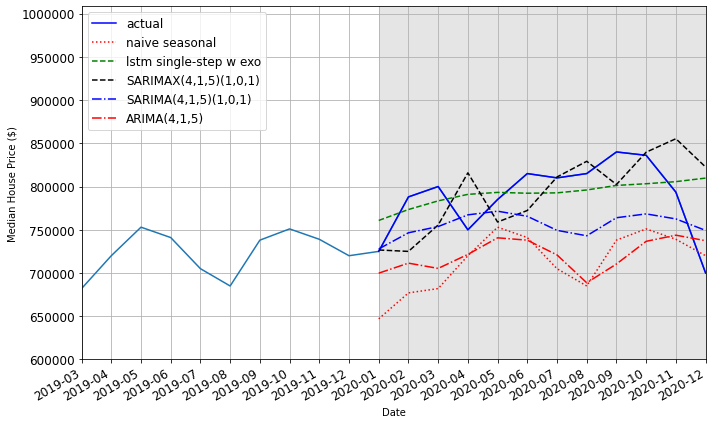

In [83]:
fig, ax = plt.subplots(figsize=(10, 6))
#plt.figure(figsize=(20, 20))
t_stats['Month'] = t_stats['Month'].astype(str)
t_stats['Month'] = pd.to_datetime(t_stats['Month'])
 
ax.plot(t_stats['Median Price'])
ax.plot(pred_df_Y_PLOT['actual'], 'b-', label='actual')
ax.plot(pred_df_Y_PLOT['pred_naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(pred_df_Y_PLOT['pred_lstm_st'], 'g--', label='lstm single-step w exo')
ax.plot(pred_df_Y_PLOT['pred_SARIMAX_Y4'], 'k--', label='SARIMAX(4,1,5)(1,0,1)')
ax.plot(pred_df_Y_PLOT['pred_SARIMA_Y'], 'b-.', label='SARIMA(4,1,5)(1,0,1)')
ax.plot(pred_df_Y_PLOT['pred_ARIMA_Y'], 'r-.', label='ARIMA(4,1,5)')


ax.set_xlabel('Date')
ax.set_ylabel('Median House Price ($)')

ax.set_xticks(t_stats.index)
ax.set_xticklabels(t_stats['Month'].dt.strftime('%Y-%m'))
ax.axvspan(84, 96, color='#808080', alpha=0.2)
ax.set_xlim(74, 95)

ax.get_yaxis().get_major_formatter().set_scientific(False)
y_lower_limit = 600000  
ax.set_ylim(y_lower_limit, ax.get_ylim()[1])
ax.tick_params(axis='both', which='both', labelsize=12)

plt.grid(True)

legend = ax.legend(loc=0, prop={'size': 12})
fig.autofmt_xdate()
plt.tight_layout()
plt.show()

In [84]:
best_modelSARIMAX = SARIMAX(target_trainY, exog_trainY, order=(4,1,5), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMAX = best_modelSARIMAX.fit(disp=False)
 
print(best_modelSARIMAX.summary())

best_modelSARIMA = SARIMAX(target_trainY, order=(4,1,5), 
 seasonal_order=(1,0,1,12), simple_differencing=False)
best_modelSARIMA = best_modelSARIMA.fit(disp=False)
 
print(best_modelSARIMA.summary())

best_modelARIMA = SARIMAX(target_trainY, order=(4,1,5), simple_differencing=False)
best_modelARIMA = best_modelARIMA.fit(disp=False)
 
print(best_modelARIMA.summary())

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                         Median Price   No. Observations:                   84
Model:             SARIMAX(4, 1, 5)x(1, 0, [1], 12)   Log Likelihood                -940.316
Date:                              Tue, 29 Aug 2023   AIC                           1926.631
Time:                                      23:41:45   BIC                           1982.265
Sample:                                           0   HQIC                          1948.982
                                               - 84                                         
Covariance Type:                                opg                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
CPI_Can                   2.267e+04   8106.845      2.796      0.005  

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                         Median Price   No. Observations:                   84
Model:             SARIMAX(4, 1, 5)x(1, 0, [1], 12)   Log Likelihood                -959.824
Date:                              Tue, 29 Aug 2023   AIC                           1943.649
Time:                                      23:41:46   BIC                           1972.675
Sample:                                           0   HQIC                          1955.310
                                               - 84                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0972      0.416     -0.234      0.815      -0.912       0.718
ar.L2         -0.93

/Users/user/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
